In [ ]:
# Copyright 2024 Stephan Bscheider sbsch@bu.edu
# Copyright 2024 Humzah Durrani hhd8@bu.edu
# Copyright 2024 Alex Tianji Sun tianjis@bu.edu

Lesson on various mechanical principles of motion

1. Four Bar Linkage 
2. Cam Follower
3. Gear Ratio 

4-Bar Linkage:

4-Bar Linkages have been a well mapped mechanical device that can be used for many things. A 4-bar linkage is described by one crank arm, a coupler arm, a rocker arm, and one connector arm in that sequence. One of the biggest advantages is in the design by converting rotational motion into controlled mechanical motion. It has been described that these linkages can be designed in ways to math function paths. The math to create those specified motions is extremely complicated. To begin, learning about 4-Bar linkages, we have made an interactive animation that allows the users to change the length of the crank and rocker arm to see how the motion of the arm changes. As you can see the during the animation during certain degree ranges for certain 4-bar linkage setups, why does it disappear?

In [ ]:
## Four Bar Linkage
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider
from IPython.display import HTML

%matplotlib notebook

# Default link lengths (THIS SETUP WORKS - IF ANIMATION FAILS SET CRANK = 2, and COUPLER = 5)
#Note certain setups fail entirely or fail through certain degree ranges, Why?
L1 = 2  # Default Crank length
L2 = 6  # Default Coupler length
L3 = 5  # Default Rocker length
L4 = 9  # Ground link length

def calculate_positions(theta_2, crank_length, coupler_length):
    # Init Positions
    x1 = 0
    y1 = 0
    x4 = 9
    y4 = 0


    x2 = x1 + crank_length * math.cos(theta_2)
    y2 = y1 + crank_length * math.sin(theta_2)
    BD = math.sqrt((x2 - x4) ** 2 + (y2 - y4) ** 2)
    
    # Check if the position is feasible based on link lengths
    if BD > coupler_length + L3 or BD < abs(coupler_length - L3):
        # Unreachable configuration, return NaNs
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan

    # Calculate angles for triangle BCD (LAW OF COSINES)
    beta = math.atan2(y2 - y4, x2 - x4)
    phi = math.acos((L3 ** 2 + BD ** 2 - coupler_length ** 2) / (2 * L3 * BD))
    
    # Two possible solutions for theta_3
    theta_3_a = beta + phi
    theta_3_b = beta - phi

    # Choose one of the configurations
    theta_3 = theta_3_a if theta_3_a < theta_3_b else theta_3_b

    # Calculate point C (end of coupler link)
    x3 = x4 + L3 * math.cos(theta_3)
    y3 = y4 + L3 * math.sin(theta_3)
    
    return x1, y1, x2, y2, x3, y3, x4, y4

# Set up figure and axis
fig, ax = plt.subplots()
ax.title('4 Bar Linkage Animation')
ax.set_aspect('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
line, = ax.plot([], [], 'o-', lw=2)

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Update function for each frame
def update(frame, crank_length, coupler_length):
    theta_2 = np.radians(frame)
    x1, y1, x2, y2, x3, y3, x4, y4 = calculate_positions(theta_2, crank_length, coupler_length)
    line.set_data([x1, x2, x3, x4, x1], [y1, y2, y3, y4, y1])
    return line,

# Create animation function with parameters for crank and coupler lengths
def create_animation(crank_length, coupler_length):
    plt.close(fig)
    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 10),
                        fargs=(crank_length, coupler_length),
                        init_func=init, blit=True)
    return HTML(ani.to_jshtml())
    

# Use interact to add sliders for crank and coupler lengths
#Need to potentially tune further because it fails at the ends
interact(create_animation,
         crank_length=FloatSlider(min=1, max=15, step=0.5, value=L1, description='Crank Length'),
         coupler_length=FloatSlider(min=1, max=15, step=0.5, value=L2, description='Coupler Length'))

Cam Follower
    
A cam follower is one type mechanical device that is used to translate rotational motion into linear motion. The rotating element or the cam usually has a distict profile or shape, and as it rotates the follower, which is stationary in the x axis, follows the profile and "tracks" the y position of the rotating surface. 

This function is distict from something like a piston, that translates linear motion to rotational motion, because the cam profile can be adjusted to get specific period behavior from the the linear follower. In the following example the cam is half circle and half ellipse, so for 180 degrees of the rotation, or half the time, the follower will stay still, then for the other 180 degrees of rotation the follower will trace a parabolic curve based on the size of the ellipse. In the model try adjusting the rotation speed, major and minor axes lengths and see how the vertical position plot reacts.

In [2]:
## Cam Follower Code
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg') #This works nice using tk backend to run the matplotlib window so it can update out of line with the notebook

cv.destroyAllWindows()

## Initialize Variables for CV animation

center = (256, 256)  # Center of the oval
stick_height = 50  # Height of the stick
stick_pos_x = 256  # X position of the stick
i=0
angle = 0
majorAxis = 75  # Length of the axes of the oval
minorAxis = 50  
angle_step = 2  # Angle step for rotation

## Initialize OPEN CV Animation
# Create a window to display the animation
cv.namedWindow('Cam Follower', cv.WINDOW_NORMAL)
cv.resizeWindow('Cam Follower', 800, 800)

# Placeholder empty funct for trackbars
def nothing(x):
    pass

# Create trackbars for adjusting cam speed and axes
cv.createTrackbar('Speed', 'Cam Follower', 2, 10, nothing)
cv.createTrackbar('Major Axis', 'Cam Follower', 75, 200, nothing)
cv.createTrackbar('Minor Axis', 'Cam Follower', 50, 200, nothing)


## Initialize Matplotlib
t = np.linspace(1,100,100)
ytemp = np.zeros(100) # Array for plotting 

# Create figure and axes
plt.ion()
fig, ax = plt.subplots()
line1, = ax.plot(t, ytemp, label='Follower Height')
ax.legend()

# Set up plot limits
ax.set_xlim(0, 100)
ax.set_ylim(0,200)


while True:
    # Create a black image
    img = np.zeros((512, 512, 3), np.uint8)
    
    # Calculate the rotation angle every loop
    angle = i * angle_step
    
    # Create vector of points representing the cam for calculation use later
    Cvector = cv.ellipse2Poly(center, (minorAxis,minorAxis), angle, 0, 360, 1)
    Evector = cv.ellipse2Poly(center, (majorAxis,minorAxis), angle, 0, 360, 1)
    
    # Draw ellipses to represent the calculated cam
    cv.ellipse(img, center, (majorAxis,minorAxis), angle, 90, 270, (255, 0, 0), -1)
    cv.ellipse(img, center, (minorAxis,minorAxis), angle, -90, 90, (255, 0, 0), -1)
    cv.ellipse(img, center, (6,6), 0, 0, 360, (10, 10, 10), -1)
    
    # depending on the angle (on circle side or ellipse side of cam), calcuate the largest y value for a specifc x value
    if np.sin(np.radians(angle)) >= 0:
        matching = np.where((Evector[:,0] >= stick_pos_x-2) & (Evector[:,0] <= stick_pos_x+2))[0]
        yheight = min(Evector[matching[:],1])
    elif np.sin(np.radians(angle)) < 0:
        matching = np.where((Cvector[:,0] >= stick_pos_x-2) & (Cvector[:,0] <= stick_pos_x+2))[0]
        yheight = min(Cvector[matching[:],1])
    else:
        pass
    
    #Draw Follower Stick
    cv.line(img,(stick_pos_x,yheight-stick_height),(stick_pos_x,yheight),(0,255,0),2)
    
    # Display the image
    cv.imshow('Cam Follower', img)

    # Matplotlib update, Shift the data in the ytemp over one and add the new data point
    ytemp = np.append(ytemp, -yheight + center[1])
    ytemp = ytemp[1:]
    line1.set_xdata(t)  # Update the x data
    line1.set_ydata(ytemp)  # Update the y data
    fig.canvas.draw_idle()  # Plot updated figure
    fig.canvas.flush_events()  # This does somethign to not crash the code
  

    # Recheck the trackbar values at the end of each loop and reassign them to the vars
    angle_step = cv.getTrackbarPos('Speed', 'Cam Follower')
    majorAxis = cv.getTrackbarPos('Major Axis', 'Cam Follower')
    minorAxis = cv.getTrackbarPos('Minor Axis', 'Cam Follower')
    
    # Increment for the angle
    i = i + 1

    # This is the exit for the loop 'q' to quit
    if cv.waitKey(50) & 0xFF == ord('q'):
        break

# Destroy the window after quit
cv.destroyAllWindows()
plt.close(fig)


ModuleNotFoundError: No module named 'cv2'

A gearbox is a mechanical system that uses interlocking gears to transfer and modify power and motion between different components. The purpose of this animation is to simulate a set of gears (Drive Gear and Driven Gear) in a gearbox. To simplfy the process, we have set a speed for the drive gear and changing the radius of the gear can change the spinning speed and ratio of the gear. 

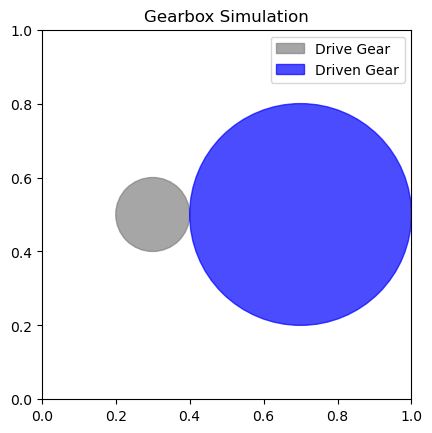

interactive(children=(FloatSlider(value=0.1, description='Drive Gear Size:', max=0.2, min=0.05, step=0.01), Fl…

<function __main__.display_animation(radius_drive, radius_driven)>

In [ ]:
## Gear Ratio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, FloatSlider
from IPython.display import display, HTML

# Default parameters
radius_drive = 0.1  
radius_driven = 0.3 
t = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.set(xlim=(0, 1), ylim=(0, 1), aspect='equal')
ax.set_title("Gearbox Simulation")

center_drive = (0.3, 0.5)
center_driven = (center_drive[0] + radius_drive + radius_driven, center_drive[1])


drive_gear = plt.Circle(center_drive, radius_drive, color='grey', alpha=0.7, label="Drive Gear")
driven_gear = plt.Circle(center_driven, radius_driven, color='blue', alpha=0.7, label="Driven Gear")
ax.add_patch(drive_gear)
ax.add_patch(driven_gear)

drive_line, = ax.plot([], [], color='black', lw=2)
driven_line, = ax.plot([], [], color='green', lw=2)
ax.legend()

def update(frame, radius_drive, radius_driven):
    center_driven = (center_drive[0] + radius_drive + radius_driven, center_drive[1])
    driven_gear.set_center(center_driven)
    
    speed_ratio = radius_driven / radius_drive
  
    drive_gear.set_radius(radius_drive)
    driven_gear.set_radius(radius_driven)
    
    angle_drive = frame * np.pi / 15 
    angle_driven = -frame * np.pi / (15 * speed_ratio) 
    # Update line position for drive gear
    drive_line.set_data(
        [center_drive[0], center_drive[0] + radius_drive * np.cos(angle_drive)],
        [center_drive[1], center_drive[1] + radius_drive * np.sin(angle_drive)]
    )
    
    driven_line.set_data(
        [center_driven[0], center_driven[0] + radius_driven * np.cos(angle_driven)],
        [center_driven[1], center_driven[1] + radius_driven * np.sin(angle_driven)]
    )
    
    return drive_line, driven_line

drive_slider = FloatSlider(value=0.1, min=0.05, max=0.2, step=0.01, description='Drive Gear Size:')
driven_slider = FloatSlider(value=0.3, min=0.1, max=0.5, step=0.01, description='Driven Gear Size:')

def display_animation(radius_drive, radius_driven):
    ani = animation.FuncAnimation(fig, update, frames=range(100), fargs=(radius_drive, radius_driven), interval=50, blit=True)
    display(HTML(ani.to_jshtml()))  

interact(display_animation, radius_drive=drive_slider, radius_driven=driven_slider)
